# Lesson 2 Demo 3: Creating Fact and Dimension Tables with Star Schema

<img src="images/postgresSQLlogo.png" width="250" height="250">

### Walk through the basics of modeling data using Fact and Dimension tables.  In this demo, we will:<br>
<ol><li>Create both Fact and Dimension tables<li>Show how this is a basic element of the Star Schema.

### Import the library 
Note: An error might popup after this command has executed. If it does, read it carefully before ignoring. 

In [1]:
import psycopg2

### Create a connection to the database

In [2]:
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

### Next use that connection to get a cursor that we will use to execute queries.

In [3]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)

### For this demo we will use automatic commit so that each action is commited without having to call conn.commit() after each command. The ability to rollback and commit transactions are a feature of Relational Databases. 

In [4]:
conn.set_session(autocommit=True)

### Let's imagine we work at an online Music Store. There will be many tables in our database but let's just focus on 4 tables around customer purchases. 

`Table Name: customer_transactions
column: Customer Id
column: Store Id
column: Spent`

`Table Name: Customer
column: Customer Id
column: Name
column: Rewards`

`Table Name: store
column: Store Id
column: State`

`Table Name: items_purchased
column: customer id
column: Item Name`

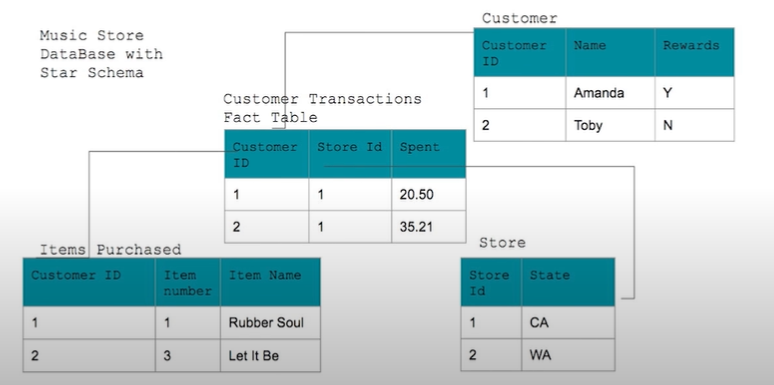

#### From this representation we can already start to see the makings of a "STAR". We have one fact table (the center of the star) and 3  dimension tables that are coming from it.

### Let's create the Fact Table and insert the data into the table

In [5]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS customer_transactions (customer_id int, store_id int, spent numeric);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
#Insert into all tables 
try: 
    cur.execute("INSERT INTO customer_transactions (customer_id, store_id, spent) \
                 VALUES (%s, %s, %s)", \
                 (1, 1, 20.50))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
try: 
    cur.execute("INSERT INTO customer_transactions (customer_id, store_id, spent) \
                 VALUES (%s, %s, %s)", \
                 (2, 1, 35.21))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)


### Let's create our Dimension Tables and insert data into those tables.

In [6]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS items_purchased (customer_id int, item_number int, item_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO items_purchased (customer_id, item_number, item_name) \
                 VALUES (%s, %s, %s)", \
                 (1, 1, "Rubber Soul"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO items_purchased (customer_id, item_number, item_name) \
                 VALUES (%s, %s, %s)", \
                 (2, 3, "Let It Be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS store (store_id int, state varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO store (store_id, state) \
                 VALUES (%s, %s)", \
                 (1, "CA"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
try: 
    cur.execute("INSERT INTO store (store_id, state) \
                 VALUES (%s, %s)", \
                 (2, "WA"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS customer (customer_id int, name varchar, rewards boolean);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO customer (customer_id, name, rewards) \
                 VALUES (%s, %s, %s)", \
                 (1, "Amanda", True))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO customer (customer_id, name, rewards) \
                 VALUES (%s, %s, %s)", \
                 (2, "Toby", False))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

**We can do a variety of queries on this data easily because of utilizing the fact/dimension and Star Schema**

* _Query 1_: Find all the customers that spent more than 30 dollars, who are they, what did they buy and if they are a rewards member

* _Query 2_: How much did Store 1 sell?

_Query 1:_  Find all the customers that spent more than 30 dollars, who are they, what did they buy and if they are a rewards member

In [7]:
try: 
    cur.execute("SELECT name, item_name, rewards FROM ((customer_transactions \
                                                JOIN customer ON customer.customer_id=customer_transactions.customer_id)\
                                                JOIN items_purchased ON \
                                                customer_transactions.customer_id=items_purchased.customer_id)\
                                                WHERE spent > 30 ;")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Toby', 'Let It Be', False)


_Query 2:_ How much did Store 1 sell?

In [8]:
try: 
    cur.execute("SELECT store_id, SUM(spent) FROM customer_transactions GROUP BY store_id;")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

(1, Decimal('55.71'))


### Summary: What you can see here is from this elegant schema we were able to get "facts/metrics" from our fact table (how much each store sold), and also information about our customers that will allow us to do more indepth analytics to get answers to business questions by utilizing our fact and dimension tables. 

### For the sake of the demo, I will drop the table. 

In [9]:
try: 
    cur.execute("DROP table customer_transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table items_purchased")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table customer")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [10]:
cur.close()
conn.close()